In [1]:
!pip install scikit-image

  Attempting uninstall: pillow
    Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


In [1]:
import numpy as np
import os
import pathlib
import skimage.io as io
import skimage.transform as tf
import skimage.color as color
import torch

In [2]:
# !pip install haroun==0.1.1

# import my Library (Pytorch Framework)
from haroun import Data, Model, ConvPool
from haroun.augmentation import augmentation
from haroun.losses import rmse
from deepfake_model import Network

In [7]:
def load_data():
    path = "Z:/Code/Facial_Biometrics_Project/real_and_fake_face/"
    images = []
    labels = []


    for directory in os.listdir(path):
        data_path = path + directory
        
        for im in os.listdir(data_path)[:]:
            image = io.imread(f"{data_path}/{im}")
            image = tf.resize(image, (64, 64))
            images.append(image)
            if directory == "training_fake":
                labels.append("fake")
            elif directory == "training_real":
                labels.append("real")
    

    images = np.array(images)
    labels = np.array(labels)

    images, labels = augmentation(images, labels, flip_y=True, flip_x=True, brightness=True)

    return images, labels

In [8]:
classes = {'real': 0, 'fake': 1}
data = Data(loader=load_data(), classes=classes)
data.shape()

Data loaded successfully :)
Images shape: (25092, 64, 64, 3) Labels shape: (25092,)



In [9]:
data.stat()

{'real': 12972, 'fake': 12120}


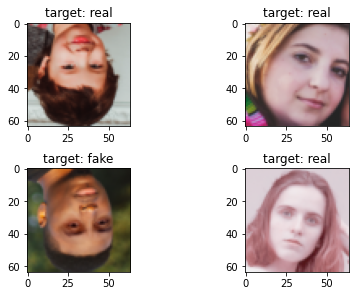

In [10]:
data.show()

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data.dataset(split_size=0.05, shuffle=True, random_state=42,
             images_format=torch.float32, labels_format=torch.float32,
             permute=True, one_hot=True, device=device)

In [5]:
net = Network()
AntiSpoofClassifier = Model(net, "adam", rmse, device)
AntiSpoofClassifier.train(train_data=(data.train_inputs, data.train_outputs),
                          val_data=(data.val_inputs, data.val_outputs),
                          epochs=200, patience=20, batch_size=32, learning_rate=1.0E-3)

NameError: name 'device' is not defined

In [15]:
AntiSpoofClassifier.evaluate(test_data=(data.test_inputs, data.test_outputs))



Test accuracy:98.6%
Correct predictions: 618, Wrong predictions: 9


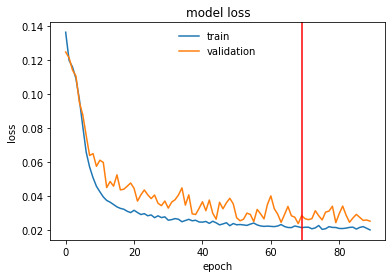


Checkpoint saved successfully :)


In [16]:
AntiSpoofClassifier.plot()
AntiSpoofClassifier.save(path="./", checkpoint_name="module")